In [171]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
import nltk
import re
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer

In [172]:
df = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', delimiter='\t', header=None)

In [173]:
df.columns=['Sentences','Labels']

In [174]:
df.head()

,Sentences,Labels
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [175]:
df['Labels'] = df['Labels'].apply(lambda x : "Positive" if x == 1 else 'Negative')

In [176]:
df.head()

,Sentences,Labels
0,"a stirring , funny and finally transporting re...",Positive
1,apparently reassembled from the cutting room f...,Negative
2,they presume their audience wo n't sit still f...,Negative
3,this is a visually stunning rumination on love...,Positive
4,jonathan parker 's bartleby should have been t...,Positive


In [177]:
df['Labels'].value_counts()

Positive    3610
Negative    3310
Name: Labels, dtype: int64

# WORD TOKENIZER AND LEMMATIZATION

In [178]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jehanzaib.jalal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jehanzaib.jalal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jehanzaib.jalal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [179]:
import re 
def clean_data(Tweets):
    count = 0

    Tweets_cleaned = []

    # rules for elements being eliminated from the tweets
    r_at = r'@[A-Za-z0-9_]+'  # Removing @ from all tweets
    r_hash = r'#[A-Za-z0-9_]+' # Removing hash tags
    r_rt = r'RT '  # Removing RT i.e. if the tweet is a retweet
    r_emoji = '[^a-zA-Z]'  # Removing emoji and replacing with space
    #r_brandtag=r'#'+brand.lower()
    
    tokens=[]
    r_se = r'[:]]'
    r_se2 = r'[=)]'
    r_se3 = r'[:-D]'
    r_se4 = r'[:D]'
    r_se5 = r'[=D]'
    r_se6 = r'[:)]'

    r_sae2 = r'[:(]'
    r_sae3 = r'[:[]'
    r_sae4 = r'[=(]'
    
    r_ae = r'[>:(]'
    r_ae2 = r'[>:(]'
    
    r_le = r'[(y)]'
    r_le2 = r'[(Y)]'
    
    for t in Tweets:
        
        
        clean_tweets = re.sub(r'|'.join((r_at, r_rt)),'',t)  
        
        clean_tweets = re.sub('https?:[A-Za-z0-9./]+','URL',clean_tweets)
        clean_tweets = re.sub(r_hash, ' ', clean_tweets)
        clean_tweets = re.sub(r_emoji, ' ', clean_tweets)
        clean_tweets = re.sub('[\s ]+', ' ',clean_tweets)
        clean_tweets = clean_tweets.lower()
        

        

        Tweets_cleaned.append(clean_tweets)

    return Tweets_cleaned#, tokens

# AFTER CLEANING

In [180]:
cleaned_sentences = clean_data(list(df['Sentences']))

In [181]:
cleaned_sentences[0:10]

['a stirring funny and finally transporting re imagining of beauty and the beast and s horror films',
 'apparently reassembled from the cutting room floor of any given daytime soap',
 'they presume their audience wo n t sit still for a sociology lesson however entertainingly presented so they trot out the conventional science fiction elements of bug eyed monsters and futuristic women in skimpy clothes',
 'this is a visually stunning rumination on love memory history and the war between art and commerce',
 'jonathan parker s bartleby should have been the be all end all of the modern office anomie films',
 'campanella gets the tone just right funny in the middle of sad in the middle of hopeful',
 'a fan film that for the uninitiated plays better on video with the sound turned down',
 'b art and berling are both superb while huppert is magnificent',
 'a little less extreme than in the past with longer exposition sequences between them and with fewer gags to break the tedium',
 'the film i

In [182]:
len(cleaned_sentences)

6920

In [183]:
y= df['Labels']
X_train, X_test, y_train, y_test = train_test_split(cleaned_sentences, y, test_size=0.10,random_state=42)

In [184]:
import nltk
from nltk.corpus import stopwords
ls = stopwords.words('english')
# ls.remove('what')
# ls.remove('which')
# ls.remove('when')
# ls.remove('how')
# ls.remove('where')
# ls.remove('why')
# # ls.remove('should')
# ls.remove('for')
# ls.remove('can')
print(ls)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [185]:
# print(ls)

# Tfidf_vectorizer

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [187]:
vectorizer  = TfidfVectorizer(stop_words=ls,
                              max_features = 10000) 
tfidf_train_X = vectorizer.fit_transform(X_train)
tfidf_test_X = vectorizer.transform(X_test)



In [188]:
cleaned_sentences[0:2]

['a stirring funny and finally transporting re imagining of beauty and the beast and s horror films',
 'apparently reassembled from the cutting room floor of any given daytime soap']

In [189]:
# y= intent
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

In [190]:
print(tfidf_train_X.shape)
print(y_train.shape)
print(tfidf_test_X.shape)
print(y_test.shape)

(6228, 10000)
(6228,)
(692, 10000)
(692,)


# SVM

In [191]:
from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [192]:
classifier = svm.LinearSVC()
classifier.fit(tfidf_train_X, y_train)

LinearSVC()

In [193]:
print(X_test[1:10])

['lrb westbrook rrb makes a wonderful subject for the camera', 'mama africa pretty much delivers on that promise', 'sad nonsense this', 'easily the most thoughtful fictional examination of the root causes of anti semitism ever seen on screen', 'tara reid plays a college journalist but she looks like the six time winner of the miss hawaiian tropic pageant so i do n t know what she s doing in here', 'a classy sprightly spin on film', 'hardly a film that comes along every day', 'watching this film one is left with the inescapable conclusion that hitchens obsession with kissinger is at bottom a sophisticated flower child s desire to purge the world of the tooth and claw of human power', 'that alabama manages to be pleasant in spite of its predictability and occasional slowness is due primarily to the perkiness of witherspoon lrb who is always a joy to watch even when her material is not first rate rrb']


In [194]:
y_pred = classifier.predict(tfidf_test_X)

In [195]:
print(y_test[-10:-5])
print(y_pred[-10:-5])

6593    Positive
6154    Positive
6088    Negative
3871    Positive
6865    Positive
Name: Labels, dtype: object
['Negative' 'Positive' 'Negative' 'Negative' 'Positive']


In [196]:
print(type(y_test))
print(type(y_pred))
print(type(X_test))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'list'>


# CLASSIFICATION SCORE

In [197]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)


print('Training score:',classifier.score(tfidf_train_X, y_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:" , test_accuracy)
print('\n')
print(cr)

Training score: 0.9869942196531792
Test accuracy: 0.7861271676300579


              precision    recall  f1-score   support

    Negative       0.81      0.74      0.77       341
    Positive       0.77      0.83      0.80       351

    accuracy                           0.79       692
   macro avg       0.79      0.79      0.79       692
weighted avg       0.79      0.79      0.79       692



# CONFUSION MATRIX

In [198]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from mlxtend.plotting import plot_confusion_matrix


<Figure size 432x288 with 0 Axes>

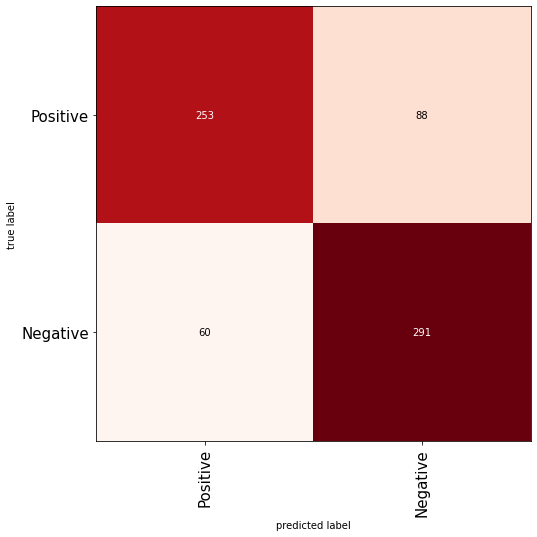

In [199]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(len(pd.unique(df['Labels']))), df['Labels'], fontsize=15)
plt.yticks(range(len(pd.unique(df['Labels']))), df['Labels'], fontsize=15)
plt.xticks(rotation=90)
plt.show()

# Testing the model

In [101]:
attitude = pd.read_csv('attitude.csv')

In [103]:
attitude = attitude[['content']]
attitude.head()

,content
0,Shame #GOPFailedTexas #maketexasblue #TexasWin...
1,What do #SolarWinds #cybersecurityleadership ...
2,#ClimateCrisis #TexasWinterStorm2021 TO BE CO...
3,@cpsenergy It is in extreme bad taste and a s...
4,Absolutely @SenTedCruz... like when you slithe...


In [129]:
print('len of sentences to predict attitude of people towards the Texas Winter Storm: ',attitude.shape[0])

len of sentences to predict attitude of people towards the Texas Winter Storm:  32040


# Predicting

In [149]:
def predict1(text):
    cleaned_sentences = clean_data(text)
#     print(cleaned_sentences)
    review_vector = vectorizer.transform(cleaned_sentences)
    label = classifier.predict(review_vector)
    return label,cleaned_sentences

In [150]:

predicted_intent,cleaned_sentences = predict1(list(attitude['content']))
print(predicted_intent)


['Negative' 'Negative' 'Positive' ... 'Positive' 'Positive' 'Negative']


In [151]:
print(len(predicted_intent))

32040


In [152]:
predicted_intent[0:10]

array(['Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative'],
      dtype=object)

In [147]:
attitude['sentiment'] = predicted_intent

In [148]:
attitude.head(10)

,content,sentiment
0,Shame #GOPFailedTexas #maketexasblue #TexasWin...,Negative
1,What do #SolarWinds #cybersecurityleadership ...,Negative
2,#ClimateCrisis #TexasWinterStorm2021 TO BE CO...,Positive
3,@cpsenergy It is in extreme bad taste and a s...,Negative
4,Absolutely @SenTedCruz... like when you slithe...,Negative
5,#EVs need a STABLE Electricity Grid. #Renewab...,Negative
6,Don�t know where to start? You�ll be more prep...,Negative
7,@koan4u @JohnCornyn @SenTedCruz @GregAbbott_TX...,Negative
8,.\n#TexasWinterStorm2021 #TexasPowerGrid \n\n@...,Negative
9,"@HoustonTX Sadly, during the deadly #TexasWint...",Negative


In [156]:

data_count = attitude.groupby('sentiment').count()


,content
sentiment,
Negative,19724
Positive,12316


In [166]:
data_count['content']

sentiment
Negative    19724
Positive    12316
Name: content, dtype: int64

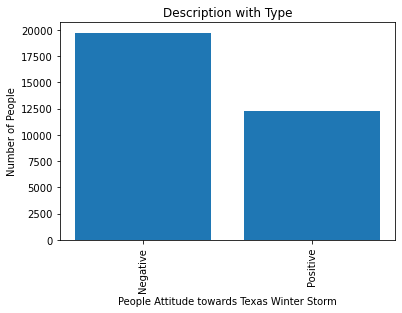

In [168]:
plt.bar(data_count.index.values,data_count['content'])
plt.title('Description with Type')
plt.xlabel('People Attitude towards Texas Winter Storm')
plt.ylabel('Number of People')
plt.plot()
plt.xticks(rotation=90)
plt.show()